In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [15]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=3
aph=.7

In [76]:
data_path = './outputs/'
spec = np.load(data_path+"isotropic_ke_spectra_0m.npz")
spec1000 = np.load(data_path+"isotropic_ke_spectra_1000m.npz")
ssh = np.load(data_path+"isotropic_spectrum_eta.npz")

In [18]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .2e-4*(ks**(-2))
Es3 = .5e-6*(ks**(-3))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')

Surface spectrum

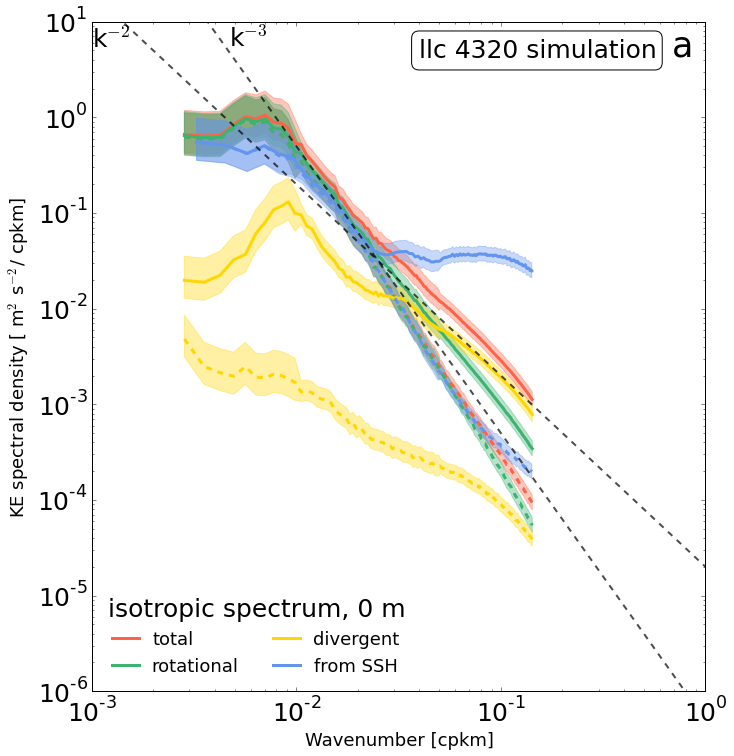

In [83]:
lw,aph=3,.36

fig = plt.figure(facecolor='w', figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.fill_between(spec['k'],spec['El'],spec['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec['k'],spec['Efl'],spec['Efu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec['k'],spec['Endl'],spec['Endu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec['k'],spec['Edl'],spec['Edu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec['k'],spec['Endfl'],spec['Endfu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec['k'],spec['Edfl'],spec['Edfu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec['kg'],spec['Egl'],spec['Egu'],\
                 color=color2, alpha=aph)
ax1.fill_between(spec['kg'],spec['Egfl'],spec['Egfu'],\
                 color=color2, alpha=aph)


ax1.loglog(spec['k'],spec['E'],color=color1,linewidth=lw,
               label=r'total')
ax1.loglog(spec['k'],spec['Ef'],'--',color=color1,linewidth=lw)

ax1.loglog(spec['k'],spec['End'],color=color3,linewidth=lw,
               label=r'rotational')
ax1.loglog(spec['k'],spec['Endf'],'--',color=color3,linewidth=lw)

ax1.loglog(spec['k'],spec['Ed'],color=color4,linewidth=lw,
               label=r'divergent')
ax1.loglog(spec['k'],spec['Edf'],'--',color=color4,linewidth=lw)

ax1.loglog(spec['kg'],spec['Eg'],color=color2,linewidth=lw,
               label=r'from SSH')
ax1.loglog(spec['kg'],spec['Egf'],'--',color=color2,linewidth=lw)

ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es3,'--', color='k',linewidth=2.,alpha=.7)
ax1.text(0.0010, 5.41,u'k$^{-2}$')
ax1.text(0.0047, 5.51,u'k$^{-3}$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')

plt.text(0.7, 4.5, "a", size=35, rotation=0.)


plt.text(0.15, 5., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

lg = plt.legend(loc=3,title='isotropic spectrum, 0 m', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1.,1./1.e6,1.e1))
plt.savefig('figs/iso_spec_model_0m',bbox_inches='tight')

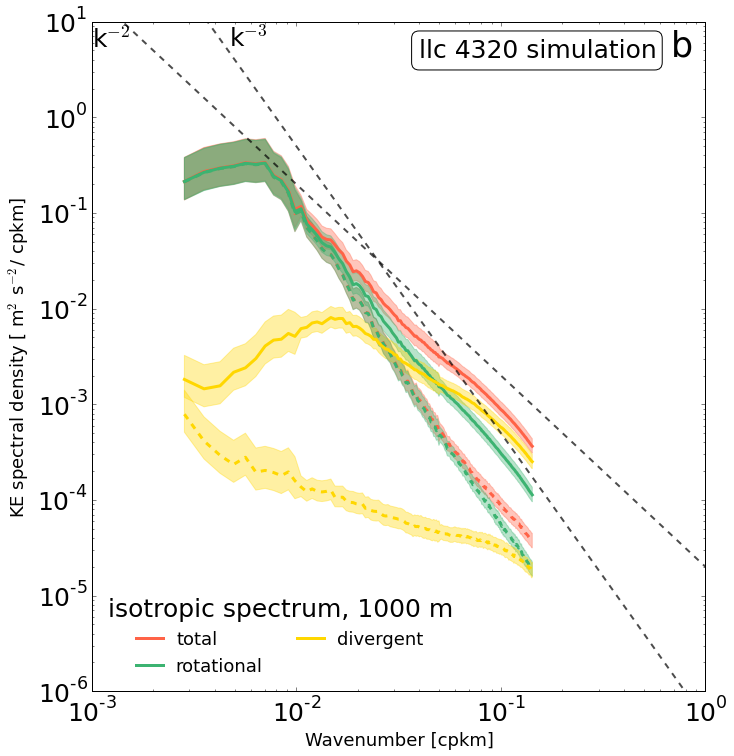

In [84]:
lw,aph=3,.36

fig = plt.figure(facecolor='w', figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.fill_between(spec1000['k'],spec1000['El'],spec1000['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Efl'],spec1000['Efu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Endl'],spec1000['Endu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Edl'],spec1000['Edu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Endfl'],spec1000['Endfu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Edfl'],spec1000['Edfu'],\
                 color=color4, alpha=aph)


ax1.loglog(spec1000['k'],spec1000['E'],color=color1,linewidth=lw,
               label=r'total')
ax1.loglog(spec1000['k'],spec1000['Ef'],'--',color=color1,linewidth=lw)

ax1.loglog(spec1000['k'],spec1000['End'],color=color3,linewidth=lw,
               label=r'rotational')
ax1.loglog(spec1000['k'],spec1000['Endf'],'--',color=color3,linewidth=lw)

ax1.loglog(spec1000['k'],spec1000['Ed'],color=color4,linewidth=lw,
               label=r'divergent')
ax1.loglog(spec1000['k'],spec1000['Edf'],'--',color=color4,linewidth=lw)


ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es3,'--', color='k',linewidth=2.,alpha=.7)
ax1.text(0.0010, 5.41,u'k$^{-2}$')
ax1.text(0.0047, 5.51,u'k$^{-3}$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
plt.text(0.7, 4.5, "b", size=35, rotation=0.)

plt.text(0.15, 5., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

lg = plt.legend(loc=3,title='isotropic spectrum, 1000 m', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1.,1./1.e6,1.e1))
plt.savefig('figs/iso_spec_model_1000m',bbox_inches='tight')

# SSH variance spectrum
The SSH variance spectrum of hourly fields presents a "break" at about 40 km; the shape of the spectrum  changes from about $\kappa^{-5}$ to $\kappa^{-1}$. We attribute this signigicant spectral flattening to the contribution of unbalanced flows, likely dominated by inertia-gravity waves. These motions are very incoherent. Removing tidal frequencies using T-TIDE does not affect the spectrum at small scales; tidal motions are dominated by barotropic tides and project onto very large scales. 

Filtering out all fast flows by daily-averaging supress most of the high-wavenumber variance. The spectrum of filtered motions is consistent with predictions of isotropic interior QG turbulence.

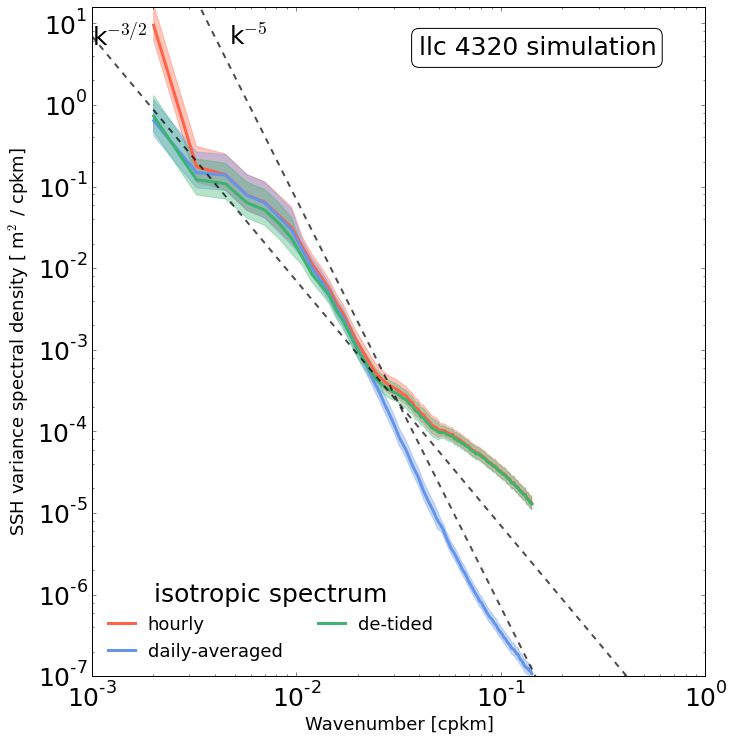

In [86]:
fig = plt.figure(facecolor='w', figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.fill_between(ssh['k'],ssh['El'],ssh['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(ssh['k'],ssh['Efl'],ssh['Efu'],\
                 color=color2, alpha=aph)
ax1.fill_between(ssh['k'],ssh['Edt_l'],ssh['Edt_u'],\
                 color=color3, alpha=aph)

ax1.loglog(ssh['k'],ssh['E'],color=color1,linewidth=lw,
               label=r'hourly')
ax1.loglog(ssh['k'],ssh['Ef'],color=color2,linewidth=lw,
               label=r'daily-averaged')
ax1.loglog(ssh['k'],ssh['Edt'],color=color3,linewidth=lw,
               label=r'de-tided')


ax1.loglog(ssh['ks'],ssh['Es5'],'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ssh['ks'],ssh['Es3_2'],'--', color='k',linewidth=2.,alpha=.7)
ax1.text(0.0010, 5.41,u'k$^{-3/2}$')
ax1.text(0.0047, 5.51,u'k$^{-5}$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'SSH variance spectral density [ m$^{2}$ / cpkm]')

lg = plt.legend(loc=3,title='isotropic spectrum', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.text(0.15, 5., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.axis((1./1.e3,1.,1./1.e7,1.6e1))
plt.savefig('figs/iso_spec_model_ssh',bbox_inches='tight')